In [1]:
from PIL import Image

## 13

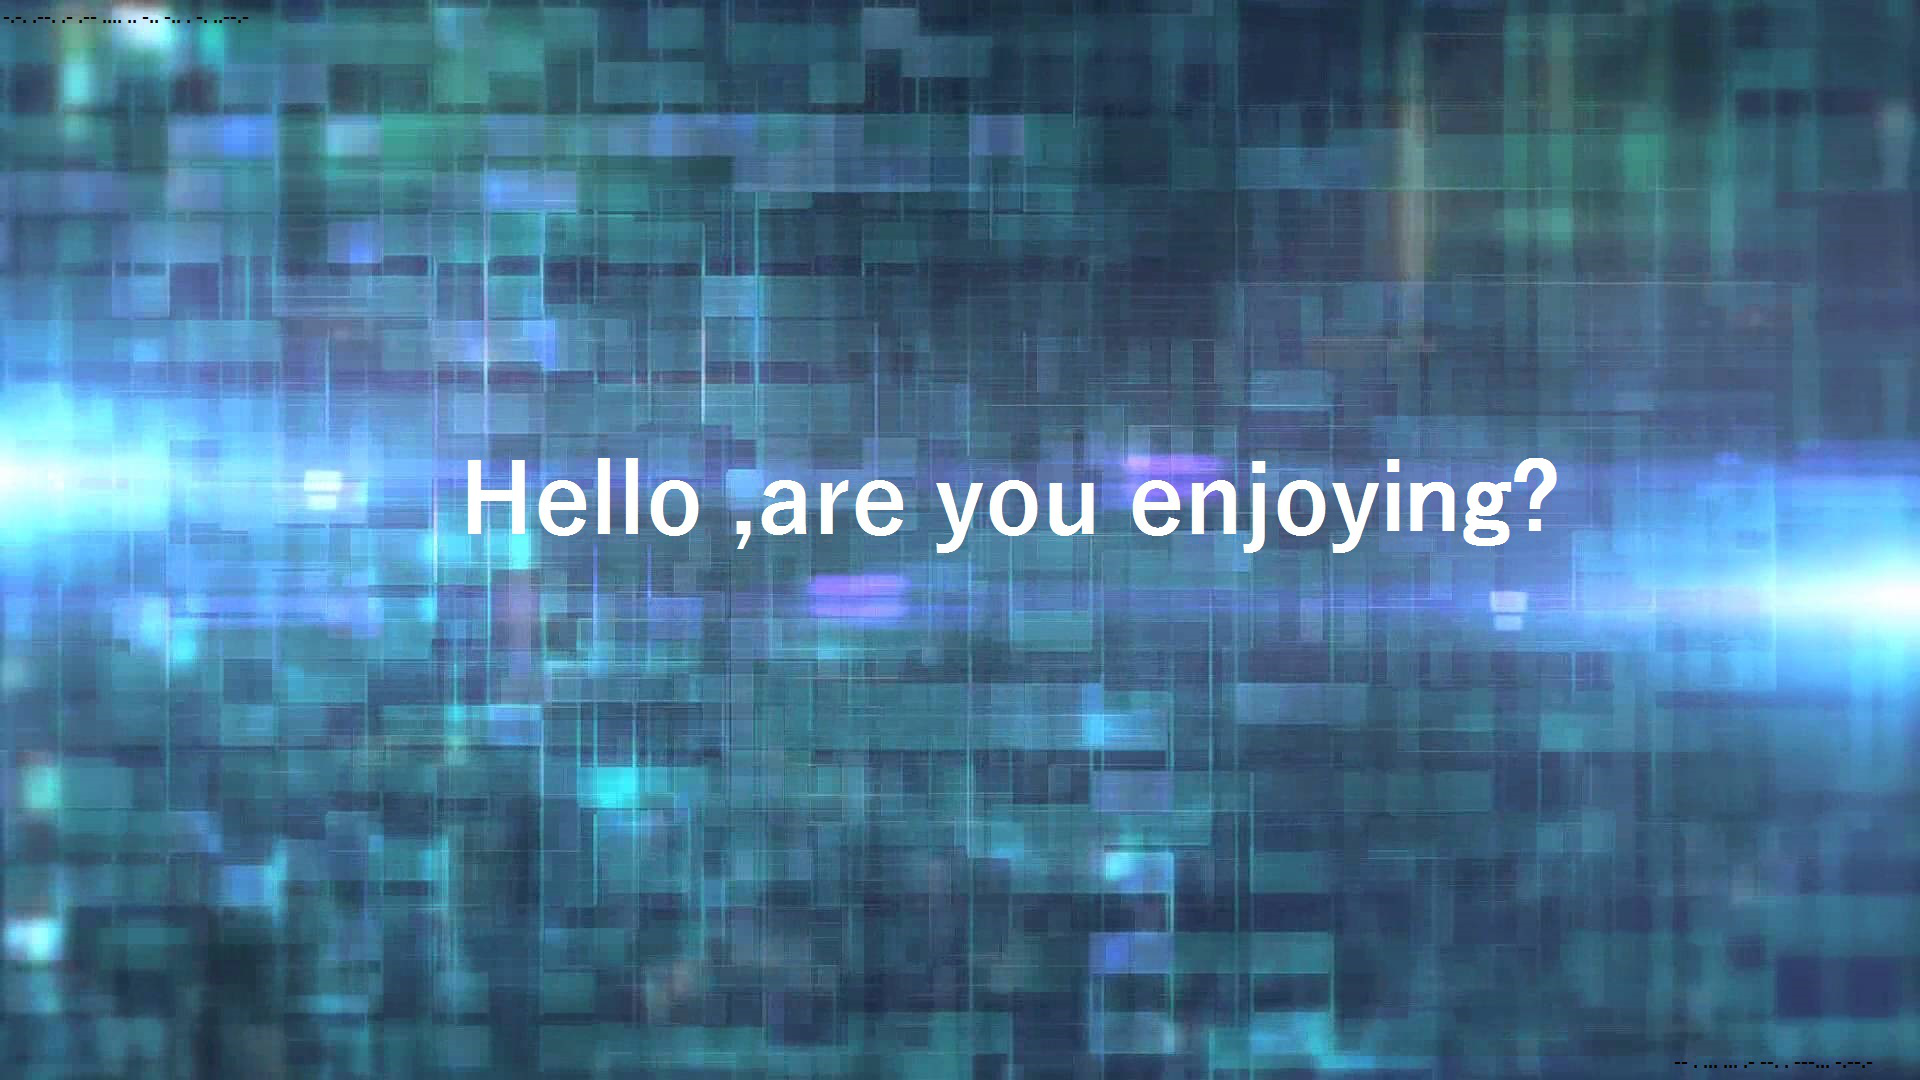

In [2]:
img = Image.open("steg10.jpg")
img

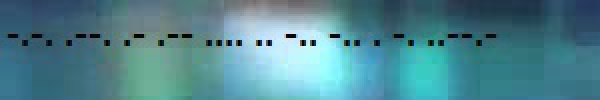

In [10]:
img.crop((0, 0, 300, 50)).resize((600, 100))

-.-. .--. .- .-- .... .. -.. -.. . -. ..--.-  
CPAWHIDDEN_

In [6]:
w, h = img.size
w, h

(1920, 1080)

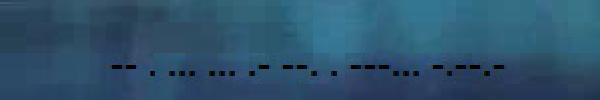

In [11]:
img.crop((w-301, h-51, w, h)).resize((600, 100))

-- . ... ... .- --. . ---... -.--.-  
MESSAGE:)

## 15

In [13]:
import requests

In [14]:
r = requests.get("http://q15.ctf.cpaw.site")

In [21]:
res = r.history[0]

In [22]:
res.headers

{'Server': 'nginx', 'Date': 'Sun, 15 Mar 2020 20:58:29 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Length': '0', 'Connection': 'keep-alive', 'X-Powered-By': 'PHP/7.1.8', 'X-Flag': 'cpaw{4re_y0u_1ook1ng_http_h3ader?}', 'Location': 'http://q9.ctf.cpaw.site'}

## 21

In [2]:
for x in [ 0x79, 0x61, 0x6B, 0x69, 0x6E, 0x69, 0x6B, 0x75, 0x21]:
    print(chr(x), end='')

yakiniku!

## 28

In [20]:
from ftplib import FTP

In [35]:
ftp = FTP('157.7.52.186')

In [36]:
ftp.login(user="cpaw_user", passwd="5f4dcc3b5aa765d61d8327deb882cf99")

'230 Login successful.'

In [37]:
ftp.sendcmd("SYST")

'215 UNIX Type: L8'

In [38]:
ftp.sendcmd("FEAT")

'211-Features:\n EPRT\n EPSV\n MDTM\n PASV\n REST STREAM\n SIZE\n TVFS\n211 End'

In [32]:
ftp.sendcmd("EPSV")

'229 Entering Extended Passive Mode (|||60009|).'

In [39]:
ftp.sendcmd("MDTM /dummy")

'213 20170901172741'

In [41]:
ftp.cwd("/")

'250 Directory successfully changed.'

In [49]:
ftp.retrlines('LIST -a')

drwxr-xr-x    2 ftp      ftp            42 Jun 18  2019 .
drwxr-xr-x    2 ftp      ftp            42 Jun 18  2019 ..
-rw-r--r--    1 ftp      ftp            39 Sep 01  2017 .hidden_flag_file
-rw-r--r--    1 ftp      ftp            36 Sep 01  2017 dummy


'226 Directory send OK.'

In [12]:
# ファイルの取得（テキスト）.
with open("b.txt", "w") as f:
    ftp.retrlines("RETR /dummy", f.write)

In [13]:
with open("b.txt") as f:
    print(f.read())

FLAG file exists in this directory.


In [50]:
# ファイルの取得（テキスト）.
with open("c.txt", "w") as f:
    ftp.retrlines("RETR /.hidden_flag_file", f.write)

In [51]:
with open("c.txt") as f:
    print(f.read())

cpaw{f4p_sh0u1d_b3_us3d_in_3ncryp4i0n}


In [11]:
from pprint import pprint

# ファイルの情報を取得.
items = ftp.mlsd()
for filename, opt in items:
    print("---------------")
    print(filename)
    pprint(opt)

error_perm: 500 Unknown command.